In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats

In [2]:
data = []
for i in range(2):
    file_str = "data/data_"+str(i)+"_truth_300.dat"
    df = pd.read_csv(file_str,header=0,names=["top_mass","m_total","Jpsi_E","Jpsi_px","Jpsi_py","Jpsi_pz","l_E","l_px","l_py","l_pz","is_elec"])
    df = df[df.m_total <= 100000.0]
    df = df.sample(frac=1).reset_index(drop=True)
    if(i==0):
        len_0 = df.shape[0]
    if(i==1):
        len_1 = df.shape[0]
    data.append(df)
if(len_1>len_0):
    data[1].drop(df.tail(len_1-len_0).index,inplace=True) 
elif(len_0 > len_1):
    data[0].drop(df.tail(len_0-len_1).index,inplace=True) 

In [3]:
data[1]

top_mass     m_total         Jpsi_E        Jpsi_px        Jpsi_py  \
0          175.0  163.728136  182304.934454  -57682.445312  -13386.738281   
1          175.0   98.667033   15841.938814  -15143.243164    3462.834229   
2          175.0  207.348725  221109.901824   81483.476562  -25164.220703   
3          175.0   36.187333  144561.032576  -96786.625000 -102661.382812   
4          175.0   95.587735   90508.185536   43521.871094  -26626.394531   
5          175.0   55.962540   36716.148036    5740.450684   -3385.738281   
6          175.0   16.418606   51732.860762   48185.667969  -18074.328125   
7          175.0   86.804320   31012.332420  -28909.996094   -3759.335937   
8          175.0   46.655727   51552.988756  -48089.613281   -4803.013184   
9          175.0  103.329881   62633.017944   20247.726562   15577.926758   
10         175.0  124.146966   95720.398399  -39407.683594  -51382.953125   
11         175.0   79.535194   25012.014093    6975.147949  -21720.779297   
12         175.0   69.181640   38286.645656   25349.992187  -23464.287109   
13         175.0   85.057361   47731.434506   39320.878906  -14018.158203   
14         175.0   85.297698   66920.143427   51964.539062   14305.179688   
15         175.0   45.770419   23915.391055    -398.414886   -6642.963867   
16         175.0   58.242018   36606.225584  -22198.736328    9089.819336   
17         175.0   82.381831   91151.728269  -14505.437500  -31443.353516   
18         175.0   99.690478  124309.944220  -91126.445312   28955.972656   
19         175.0   54.436919   82577.685894   14902.422852  -23785.095703   
20         175.0   87.374277   94753.018171  -72944.906250   14422.216797   
21         175.0   22.608587   10501.213209   -2546.831543   -8333.285156   
22         175.0   82.224420   29655.025457  -20183.093750    8786.808594   
23         175.0   47.278932   42277.980437   -1169.189575  -19475.197266   
24         175.0  105.238586   50211.451510   37334.898438    2086.360352   
25         175.0   55.810471  148648.449309   30854.968750  -12104.303711   
26         175.0   28.821287   26566.994354   12304.114258    3752.828857   
27         175.0   47.994502   92994.129898  -21605.705078    1840.680908   
28         175.0   48.971828   18382.121281  -17571.521484   -4032.149902   
29         175.0   95.561292   11334.532605   10748.972656    1615.929321   
...          ...         ...            ...            ...            ...   
99973      175.0   50.058356   54466.064096   20597.212891   33598.410156   
99974      175.0  212.188198  339052.246927   15643.984375  -29204.132812   
99975      175.0   29.157402    7687.624640    -864.586304   -1454.385498   
99976      175.0   60.769156   59832.455898   34038.496094   12286.142578   
99977      175.0  106.008867  271909.143900   55354.441406    1371.819458   
99978      175.0  127.502733  110167.833707   27483.919922  -45781.308594   
99979      175.0   14.257339  185507.290006  -60629.445313  137526.546875   
99980      175.0   46.663375   30318.623574   12110.392578    2527.522705   
99981      175.0   52.559850  190143.067101    8223.587891  -39030.171875   
99982      175.0   36.086394   95932.809149   -6905.205078  -15247.030273   
99983      175.0   69.763814   33599.606315   20809.343750  -21638.035156   
99984      175.0   53.674062  148767.501782    8944.525391  -22853.451172   
99985      175.0   93.692654  104435.942254  -13323.741211  -20700.636719   
99986      175.0  145.184898   37750.672035  -31918.728516   -9803.557617   
99987      175.0   86.154917  105259.380281   15308.125000   47314.785156   
99988      175.0  134.718134   38885.761993   -3786.754395    3628.049072   
99989      175.0   88.728060   30379.072643   11783.404297  -18645.248047   
99990      175.0   86.614992   38648.713937  -13631.626953  -34408.269531   
99991      175.0  148.536265   67190.824761    3202.148682   66835.656250   
99992      175.0   80.175150   44132.843606   11427.602539   33151.570312   
9999

In [4]:
if((data[0])["m_total"].mean() > 1000.0):
    (data[0])["m_total"] = (data[0])["m_total"]/1000.0
    (data[1])["m_total"] = (data[1])["m_total"]/1000.0

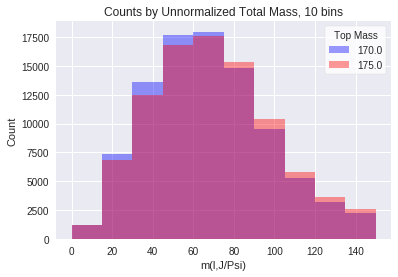

In [5]:
n1,bins1,patches1 = plt.hist(data[0]["m_total"],bins=10,range=(0,150),facecolor="b",alpha=0.4,label="170.0")
n2,bins2,patches2 = plt.hist(data[1]["m_total"],bins=10,range=(0,150),facecolor="r",alpha=0.4,label="175.0")

plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.title("Counts by Unnormalized Total Mass, 10 bins")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
#plt.savefig("mass_histo/m_l_Jpsi_unnorm_bins10.pdf")
plt.show()

In [6]:
midpts1 = []
for i in range(10):
    midpts1.append((bins1[i]+bins1[i+1])/2.0)
midpts2 = []
for i in range(10):
    midpts2.append((bins2[i]+bins2[i+1])/2.0)

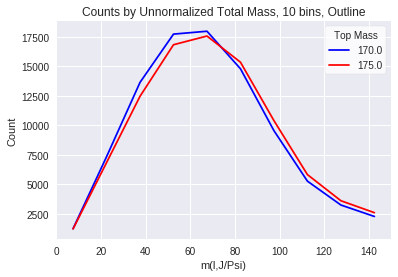

In [7]:
plt.plot(midpts1,n1,'b',label='170.0')
plt.plot(midpts2,n2,'r',label='175.0')

plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.xlim(0,150)
plt.title("Counts by Unnormalized Total Mass, 10 bins, Outline")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
#plt.savefig("mass_histo/outline_150.pdf")

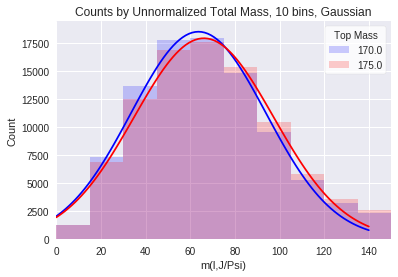

In [8]:
from scipy.optimize import curve_fit
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

popt1, pcov1 = curve_fit(gaussian, midpts1, n1,[1200,70,20])
popt2, pcov2 = curve_fit(gaussian, midpts2, n2,[1300,70,20])
i = np.linspace(0, 140, 100)
plt.plot(i, gaussian(i, *popt1),alpha=1.0,color='b')
plt.plot(i, gaussian(i, *popt2),alpha=1.0,color='r')
plt.hist(data[0]["m_total"],bins=10,range=(0,150),facecolor="b",alpha=0.2,label="170.0")
plt.hist(data[1]["m_total"],bins=10,range=(0,150),facecolor="r",alpha=0.2,label="175.0")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
plt.xlim(0,150)
plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.title("Counts by Unnormalized Total Mass, 10 bins, Gaussian")
plt.savefig("mass_histo/gaussian_histo_300.pdf")

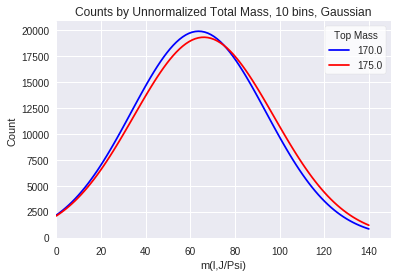

In [27]:
from scipy.optimize import curve_fit
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

popt1, pcov1 = curve_fit(gaussian, midpts1, n1,[1200,70,20])
popt2, pcov2 = curve_fit(gaussian, midpts2, n2,[1300,70,20])
i = np.linspace(0, 140, 100)
plt.plot(i, gaussian(i, *popt1),alpha=1.0,color='b',label="170.0")
plt.plot(i, gaussian(i, *popt2),alpha=1.0,color='r',label="175.0")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
plt.xlim(0,150)
plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.title("Counts by Unnormalized Total Mass, 10 bins, Gaussian")
plt.savefig("mass_histo/gaussian_150.pdf")

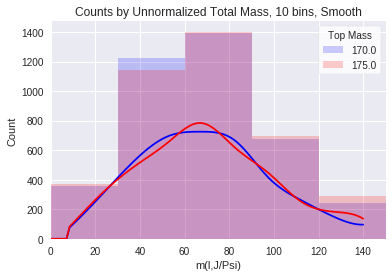

In [8]:
from scipy.interpolate import spline
smooth_fit1 = spline(midpts1,n1,i)
smooth_fit2 = spline(midpts2,n2,i)
plt.plot(i,smooth_fit1,color='b')
plt.plot(i,smooth_fit2,color='r')
plt.hist(data[0]["m_total"],bins=10,range=(0,300),facecolor="b",alpha=0.2,label="170.0")
plt.hist(data[1]["m_total"],bins=10,range=(0,300),facecolor="r",alpha=0.2,label="175.0")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
plt.xlim(0,150)
plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.title("Counts by Unnormalized Total Mass, 10 bins, Smooth")
#plt.savefig("mass_histo/m_l_Jpsi_smooth.pdf")

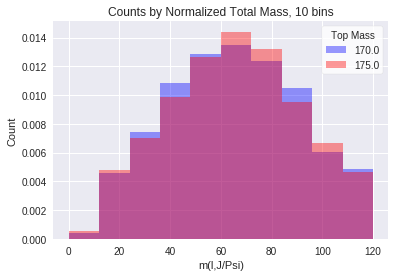

In [57]:
n1n,bins1n,patches1n = plt.hist(data[0]["m_total"],bins=10,range=(0,120),normed=True,facecolor="b",alpha=0.4,label="170.0")
n2n,bins2n,patches2n = plt.hist(data[1]["m_total"],bins=10,range=(0,120),normed=True,facecolor="r",alpha=0.4,label="175.0")



plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.title("Counts by Normalized Total Mass, 10 bins")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
#plt.savefig("mass_histo/m_l_Jpsi_norm_bins10.pdf")
plt.show()

In [58]:
midpts1n = []
for i in range(10):
    midpts1n.append((bins1n[i]+bins1n[i+1])/2.0)
midpts2n = []
for i in range(10):
    midpts2n.append((bins2n[i]+bins2n[i+1])/2.0)

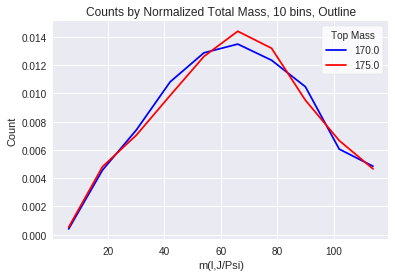

In [59]:
plt.plot(midpts1n,n1n,'b',label='170.0')
plt.plot(midpts2n,n2n,'r',label='175.0')

plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.title("Counts by Normalized Total Mass, 10 bins, Outline")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
#plt.savefig("mass_histo/m_l_Jpsi_outline_norm.pdf")

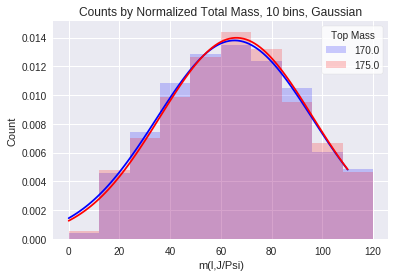

In [61]:
from scipy.optimize import curve_fit
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

popt1n, pcov1n = curve_fit(gaussian, midpts1n, n1n,[0.000014,70,20])
popt2n, pcov2n = curve_fit(gaussian, midpts2n, n2n,[0.000014,70,20])
i = np.linspace(0, 110, 100)
plt.plot(i, gaussian(i, *popt1n),alpha=1.0,color='b')
plt.plot(i, gaussian(i, *popt2n),alpha=1.0,color='r')
plt.hist(data[0]["m_total"],bins=10,range=(0,120),normed=True,facecolor="b",alpha=0.2,label="170.0")
plt.hist(data[1]["m_total"],bins=10,range=(0,120),normed=True,facecolor="r",alpha=0.2,label="175.0")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.title("Counts by Normalized Total Mass, 10 bins, Gaussian")
#plt.savefig("mass_histo/m_l_Jpsi_gaussian_norm.pdf")

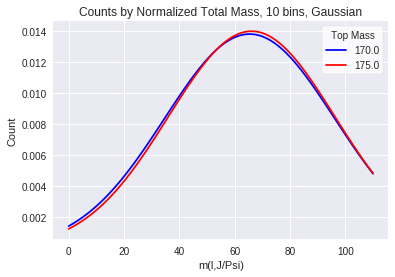

In [62]:
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

popt1n, pcov1n = curve_fit(gaussian, midpts1n, n1n,[0.000014,70,20])
popt2n, pcov2n = curve_fit(gaussian, midpts2n, n2n,[0.000014,70,20])
i = np.linspace(0, 110, 100)
plt.plot(i, gaussian(i, *popt1n),alpha=1.0,color='b',label="170.0")
plt.plot(i, gaussian(i, *popt2n),alpha=1.0,color='r',label="175.0")
#plt.hist(data[0]["m_total"],bins=10,range=(0,120000),normed=True,facecolor="b",alpha=0.2,label="170.0")
#plt.hist(data[3]["m_total"],bins=10,range=(0,120000),normed=True,facecolor="r",alpha=0.2,label="175.0")
plt.legend(frameon=True,facecolor="white",title="Top Mass")
plt.xlabel('m(l,J/Psi)')
plt.ylabel('Count')
plt.title("Counts by Normalized Total Mass, 10 bins, Gaussian")
#plt.savefig("mass_histo/m_l_Jpsi_gaussian_no_hist.pdf")